In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

parameters = {
    'axes.labelsize':  14,
    'figure.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'legend.title_fontsize': 14
}
plt.rcParams.update(parameters)

In [2]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


#### 1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

   __Построить точечный график__

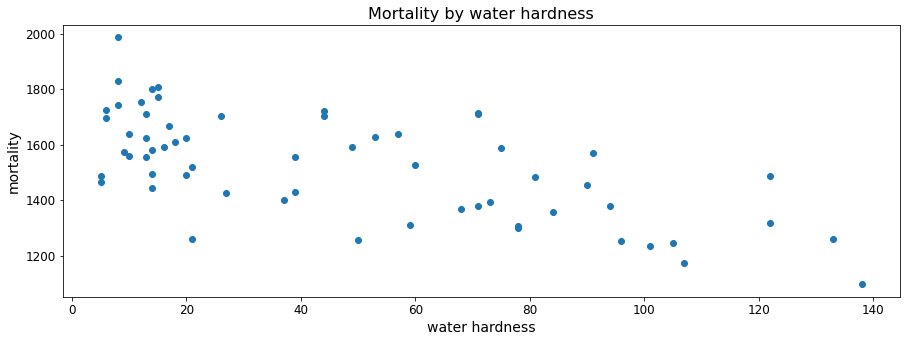

In [3]:
fig, ax = plt.subplots(1, figsize=(15, 5))
ax.scatter(df['hardness'], df['mortality'])
ax.set_xlabel('water hardness')
ax.set_ylabel('mortality')
_ = ax.set_title('Mortality by water hardness')

На рисуснке прослеживется зависимость между жёсткостью воды и уровнем смертности.

   **Рассчитать коэффициенты корреляции Пирсона и Спирмена**

In [4]:
print(stats.pearsonr(df['hardness'], df['mortality']))
print(stats.spearmanr(df['hardness'], df['mortality']))

(-0.6548486232042466, 1.0331339260349462e-08)
SpearmanrResult(correlation=-0.6316646189166502, pvalue=4.79546153722838e-08)


Замеченная выше связь между смертностью и жёсткостью воды отражается в довольно высоких коэффициентах корреляции.

   **Построить модель линейной регрессии**

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(np.array(df['hardness']).reshape(-1, 1), df['mortality'])

LinearRegression()

**Рассчитать коэффициент детерминации**

In [6]:
from sklearn.metrics import r2_score
predicted_mortality = lr.predict(np.array(df['hardness']).reshape(-1, 1))
r2_score(
    predicted_mortality,
    df['mortality']
)

-0.33194424452659765

Коэффициент детерминации для построенной модели отрицательный. Модель не очень хорошо описывает даже те данные, на которых была построена.

**Вывести график остатков**

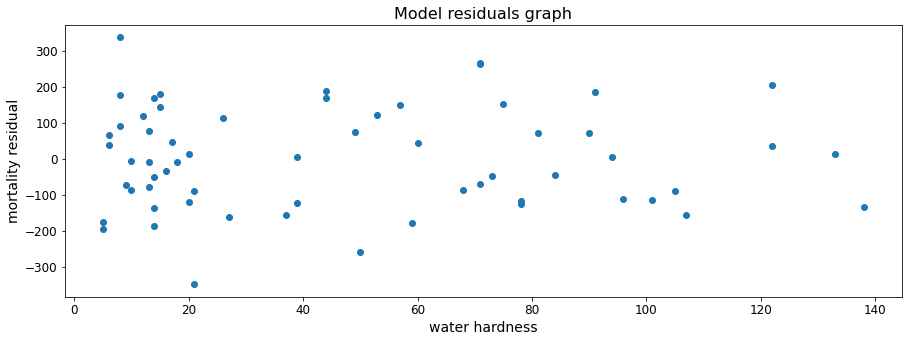

In [7]:
fig, ax = plt.subplots(1, figsize=(15, 5))
ax.scatter(df['hardness'], df['mortality']-predicted_mortality)
ax.set_xlabel('water hardness')
ax.set_ylabel('mortality residual')
_ = ax.set_title('Model residuals graph')

График остатков не имеет каких-либо заметных паттернов, что говорит в пользу построенной модели.

Связь между жёсткостью воды и смертностью есть.

#### 2 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

    Разделить данные на 2 группы
    Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [8]:
df_south = df[df['location'] == 'South']
df_north = df[df['location'] == 'North']
len(df_south), len(df_north)

(26, 35)

### Южная группа

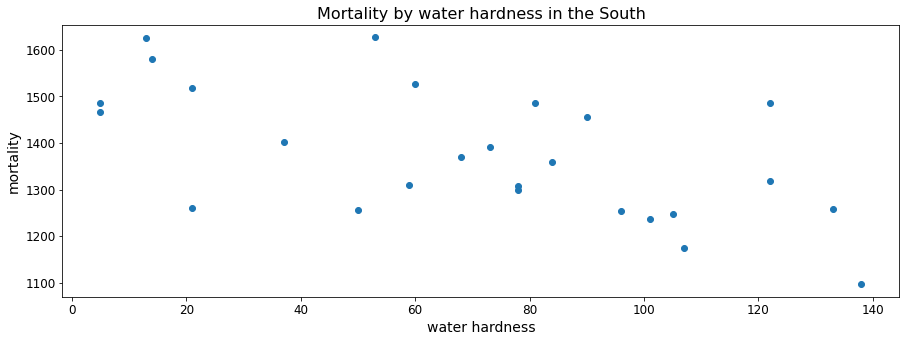

In [9]:
fig, ax = plt.subplots(1, figsize=(15, 5))
ax.scatter(df_south['hardness'], df_south['mortality'])
ax.set_xlabel('water hardness')
ax.set_ylabel('mortality')
_ = ax.set_title('Mortality by water hardness in the South')

In [10]:
print(stats.pearsonr(df_south['hardness'], df_south['mortality']))
print(stats.spearmanr(df_south['hardness'], df_south['mortality']))

(-0.6021532715484159, 0.0011346743048161897)
SpearmanrResult(correlation=-0.5957229185013566, pvalue=0.0013223867410179474)


In [11]:
lr_south = LinearRegression()
lr_south.fit(np.array(df_south['hardness']).reshape(-1, 1), df_south['mortality'])

LinearRegression()

In [12]:
predicted_mortality_south = lr_south.predict(np.array(df_south['hardness']).reshape(-1, 1))
r2_score(
    predicted_mortality_south,
    df_south['mortality']
)

-0.7579468951816131

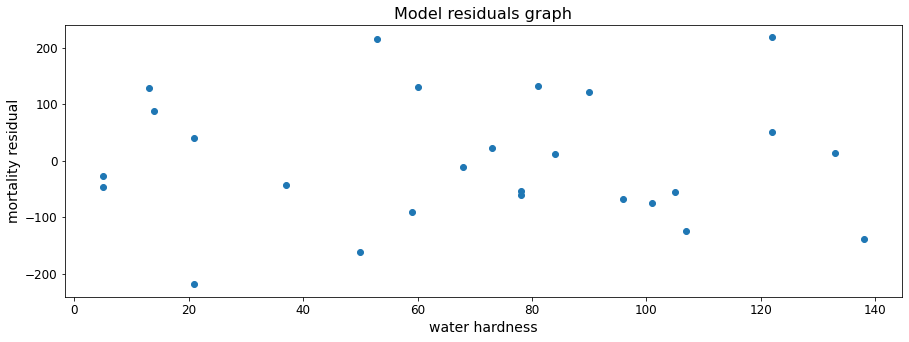

In [13]:
fig, ax = plt.subplots(1, figsize=(15, 5))
ax.scatter(df_south['hardness'], df_south['mortality']-predicted_mortality_south)
ax.set_xlabel('water hardness')
ax.set_ylabel('mortality residual')
_ = ax.set_title('Model residuals graph')

### Север

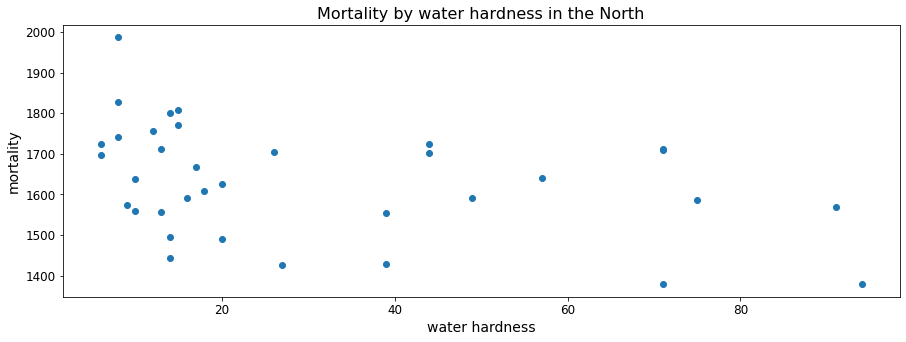

In [14]:
fig, ax = plt.subplots(1, figsize=(15, 5))
ax.scatter(df_north['hardness'], df_north['mortality'])
ax.set_xlabel('water hardness')
ax.set_ylabel('mortality')
_ = ax.set_title('Mortality by water hardness in the North')

In [15]:
print(stats.pearsonr(df_north['hardness'], df_north['mortality']))
print(stats.spearmanr(df_north['hardness'], df_north['mortality']))

(-0.36859783832887183, 0.029344659047110602)
SpearmanrResult(correlation=-0.4042078956511175, pvalue=0.01602900609606112)


In [16]:
lr_north = LinearRegression()
lr_north.fit(np.array(df_north['hardness']).reshape(-1, 1), df_north['mortality'])

LinearRegression()

In [17]:
predicted_mortality_north = lr_north.predict(np.array(df_north['hardness']).reshape(-1, 1))
r2_score(
    predicted_mortality_north,
    df_north['mortality']
)

-5.360281627512271

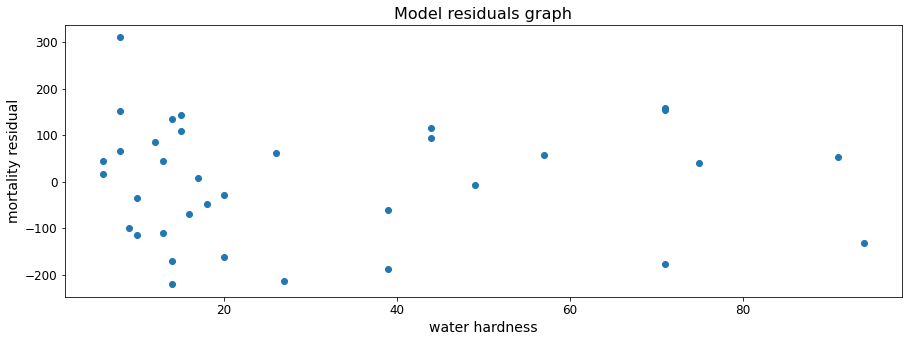

In [18]:
fig, ax = plt.subplots(1, figsize=(15, 5))
ax.scatter(df_north['hardness'], df_north['mortality']-predicted_mortality_north)
ax.set_xlabel('water hardness')
ax.set_ylabel('mortality residual')
_ = ax.set_title('Model residuals graph')

Среди южных городо зависимость мжеду жёсткостью воды и смертностью силнее, чем среди северных.